# AGYW_PREV DATIM

In [1]:
# load the modules
from layeringOfServices import DREAMS_MASTERSHEET
#multiples outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from re import sub
from pandas import DataFrame

In [3]:
DREAMS_MASTERSHEET.init_prep.unique()
DREAMS_MASTERSHEET.new_condoms.unique()

array(['errata', 'tested_on_given_date'], dtype=object)

array(['no', 'sensOuRecu'], dtype=object)

## AGYW_PREV

In [4]:
pipo = list(DREAMS_MASTERSHEET.agyw_period_range.unique())
pipo.append("Total")
sorted(list(DREAMS_MASTERSHEET.age_range.unique())[1:4])

['10-14', '15-19', '20-24']

In [5]:
sorted(pipo)


['0-6 months', '07-12 months', '13-24 months', '25+ months', 'Total']

In [6]:
class AgywPrev:
    """A class with properties and methods given the results of the indicator AGYW_PREV DATIM""" 
    __who_am_I ="DATIM"
    __datim1_title="Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package."
    __datim2_title="Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service."
    __datim3_title="Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services."
    
    def __repr__(self):
        return f"<AgywPrev {self.__i_am}>"
    
    def __str__(self):
        return f"<AgywPrev {self.__i_am}>"
    
    @classmethod
    def datim_titleI(cls):
        return cls.__datim1_title
    
    @classmethod
    def datim_titleII(cls):
        return cls.__datim2_title
    
    @classmethod
    def datim_titleIII(cls):
        return cls.__datim3_title
    
    
    def __init__(self,commune=None):
        self.__commune = commune
        self.__i_am = f"{AgywPrev.__who_am_I}"
        self.__data =  DREAMS_MASTERSHEET
        self. __total_mastersheet = self.__data.code.count()
        if self.__commune == None:
            self.__dreams_valid = self.__data[(self.__data.age_range !="not_valid_age") & (self.__data.age_range != "25-29") & (self.__data.timeOn_system == "required_Time_on")]
        else:
            self.__dreams_valid = self.__data[(self.__data.age_range !="not_valid_age") & (self.__data.age_range != "25-29") & (self.__data.timeOn_system == "required_Time_on")&(self.__data.actual_commune == f"{self.__commune}")]
        self.__total_dreams_valid = self.__dreams_valid.code.count()
        self.__dreams_valid["primary_only"] = self.__dreams_valid.apply(lambda df: self.__primFunc(df),axis=1)
        self.__dreams_valid["primary_and_OneSecondary_services"] = self.__dreams_valid.apply(lambda df: self.__primLeastOneSecFunc(df),axis=1)
        self.__dreams_valid["partial_primary_services"] = self.__dreams_valid.apply(lambda df: self.__primPartFunc(df),axis=1)
        self.__agyw_prevI = self.__dreams_valid[self.__dreams_valid.primary_only == "full_primary_only"]
        self.__agyw_prevII = self.__dreams_valid[self.__dreams_valid.primary_and_OneSecondary_services == "full_primary_leastOneSecondary"]
        self.__agyw_prevIII = self.__dreams_valid[self.__dreams_valid.partial_primary_services == "primary_part_services"]  
        self.__agyw_prevI_total = self.__agyw_prevI.code.count()
        self.__agyw_prevII_total = self.__agyw_prevII.code.count()
        self.__agyw_prevIII_total = self.__agyw_prevIII.code.count()
        self.__total_datim = self.__agyw_prevI_total + self.__agyw_prevII_total + self.__agyw_prevIII_total
        
        
    @property
    def who_am_i(self):
        return self.__i_am
    
    @property
    def data_mastersheet(self):
        return self.__data
    
    @property
    def data_dreams_valid(self):
        return self.__dreams_valid

    @property
    def total_mastersheet(self):
        return self.__total_mastersheet

    @property
    def total_dreams_valid(self):
        return self.__total_dreams_valid
    
    def __primFunc(self,df):
        if (df.ps_10_14 == "curriculum-servis" and df.hts == "errata" and df.init_prep=="errata" and df.new_condoms == "no" and df.post_care_treatment == "no" and df.socio_eco_app == "no" ): #df.condoms == "errata"
            return "full_primary_only"
        elif (df.ps_15_19 == "condoms&curriculum" and df.hts == "errata" and df.init_prep=="errata"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
            return "full_primary_only"
        #elif (df.ps_20_24 == "condoms&hts&curriculum"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
        elif (df.ps_20_24 == "condoms&curriculum" and df.hts == "errata" and df.init_prep=="errata"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
            return "full_primary_only"
        else:
            return "invalid"
    
    def __primLeastOneSecFunc(self,df):
        if (df.ps_10_14 == "curriculum-servis") and (df.hts == "tested_on_given_date" or df.init_prep=="tested_on_given_date" or df.new_condoms == "sensOuRecu" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        elif (df.ps_15_19 == "condoms&curriculum") and (df.hts == "tested_on_given_date" or df.init_prep=="tested_on_given_date" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        #elif (df.ps_20_24 == "condoms&hts&curriculum") and (df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
        elif (df.ps_20_24 == "condoms&curriculum") and (df.hts == "tested_on_given_date" or df.init_prep=="tested_on_given_date"  or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        else:
            return "invalid"
        
    def __primPartFunc(self,df):
        if (df.age_range == "15-19") and ((df.new_condoms == "sensOuRecu" and df.dreams_curriculum == "curriculum_inc") or (df.new_condoms == "no" and df.dreams_curriculum == "curriculum_completed")): #df.condoms == "tested_on_given_date"
            return "primary_part_services"
        #elif (df.age_range == "20-24") and ((df.dreams_curriculum == "curriculum_completed" and df.condoms=="errata" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_completed" and df.condoms=="tested_on_given_date" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_completed" and df.condoms=="errata" and df.hts=="tested_on_given_date")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="tested_on_given_date" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="errata" and df.hts=="tested_on_given_date")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="tested_on_given_date" and df.hts=="tested_on_given_date")):
        elif (df.age_range == "20-24") and ((df.new_condoms == "sensOuRecu" and df.dreams_curriculum == "curriculum_inc") or (df.new_condoms == "no" and df.dreams_curriculum == "curriculum_completed")):
            return "primary_part_services"
        else:
            return "invalid"
         
    @property
    def total_datimI(self):
        return self.__agyw_prevI_total
    
    @property
    def total_datimII(self):
        return self.__agyw_prevII_total
    
    @property
    def total_datimIII(self):
        return self.__agyw_prevIII_total
    
    @property
    def total_datim_general(self):
        return self.__total_datim
    
    @property
    def data_agyw_prevI(self):
        return self.__agyw_prevI

    @property
    def data_agyw_prevII(self):
        return self.__agyw_prevII

    @property
    def data_agyw_prevIII(self):
        return self.__agyw_prevIII

    __PERIOD_DATIM = sorted(list(DREAMS_MASTERSHEET.agyw_period_range.unique()))
    __PERIOD_DATIM.append("Total")
    __AGE_DATIM = sorted(list(DREAMS_MASTERSHEET.age_range.unique())[1:4])
    def datim_agyw_prevI(self):
        
        try:
            pivotableI = self.__agyw_prevI.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevI_pivot = pivotableI.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotI = list(agyw_prevI_pivot.columns)
            indexes_pivotI = list(agyw_prevI_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotI:
                    agyw_prevI_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotI:
                    agyw_prevI_pivot.loc[age] = 0
            agyw_prevI_pivot = agyw_prevI_pivot.reindex(index=AgywPrev.__AGE_DATIM, columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevI_pivot_final = agyw_prevI_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevI_results_final = DataFrame( agyw_prevI_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevI_results_final = DataFrame({"Age":["10-14","15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevI_results_final
    
    def datim_agyw_prevII(self):
        try:
            pivotableII = self.__agyw_prevII.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevII_pivot = pivotableII.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotII = list(agyw_prevII_pivot.columns)
            indexes_pivotII = list(agyw_prevII_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotII:
                    agyw_prevII_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotII:
                    agyw_prevII_pivot.loc[age] = 0
            agyw_prevII_pivot = agyw_prevII_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)            
            agyw_prevII_pivot_final = agyw_prevII_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevII_results_final = DataFrame( agyw_prevII_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevII_results_final = DataFrame({"Age":["10-14", "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevII_results_final
    
    def datim_agyw_prevIII(self):
        try:
            pivotableIII = self.__agyw_prevIII.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevIII_pivot = pivotableIII.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotIII = list(agyw_prevIII_pivot.columns)
            indexes_pivotIII = list(agyw_prevIII_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotIII:
                    agyw_prevIII_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotIII:
                    agyw_prevIII_pivot.loc[age] = 0
            agyw_prevIII_pivot = agyw_prevIII_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevIII_pivot_final = agyw_prevIII_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevIII_results_final = DataFrame( agyw_prevIII_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevIII_results_final = DataFrame({"Age":["10-14",                     "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevIII_results_final

In [7]:
%%capture
datim = AgywPrev()

In [8]:
datim.total_mastersheet 
datim.total_dreams_valid
datim.who_am_i
datim.total_datimI
datim.total_datimII
datim.total_datimIII
datim.total_datim_general
AgywPrev.datim_titleI()
datim.datim_agyw_prevI()
AgywPrev.datim_titleII()
datim.datim_agyw_prevII()
AgywPrev.datim_titleIII()
datim.datim_agyw_prevIII()

28248

18957

'DATIM'

7151

1801

7171

16123

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,982,1961,2558,0,5501
1,15-19,187,474,419,0,1080
2,20-24,50,253,267,0,570


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,124,380,372,0,876
1,15-19,41,182,213,0,436
2,20-24,39,246,204,0,489


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,538,1730,2588,0,4856
2,20-24,246,856,1213,0,2315


In [9]:
datim

<AgywPrev DATIM>

## AGYW_Prev_Commune

In [10]:
class AgywPrevCommune(AgywPrev):
    """A class that extend AgywPrev with the purpose of the indicator AGYW_PREV DATIM by commune"""
    __who_am_I ="DATIM"
    def __init__(self,name):
        self.__name = name
        self.__i_am = f"{AgywPrevCommune.__who_am_I} {self.__name}"
        #self.__data =  DREAMS_MASTERSHEET
        super().__init__(self.__name)
        
    @property
    def who_am_i(self):
        return self.__i_am
    
    def __repr__(self):
        return f"<AgywPrevCommune {self.__i_am}>"
    
    def __str__(self):
        return f"<AgywPrevCommune {self.__i_am}>"
      
        
    
        
        

        

In [11]:
DREAMS_MASTERSHEET.actual_commune.unique()

array(['Verrettes', 'Delmas', 'Port-au-Prince', 'Carrefour', 'Limonade',
       'Plaine-du-Nord', 'Cap-Haïtien', 'Kenscoff', 'Dessalines',
       'Pétionville', 'Gressier', 'Saint-Marc', 'Tabarre', 'La Chapelle',
       'Milot', 'Liancourt', 'Quartier-Morin',
       "Petite Rivière de l'Artibonite", 'Grande Saline', 'Montrouis',
       'Desdunes'], dtype=object)

## dynamic

In [12]:
%%capture
def name_handler(s):
    s = sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespace with a single dash
    s = sub(r"\s+", '_', s)
    return s

datimcommunes = []

for columns in DREAMS_MASTERSHEET.actual_commune.unique():
    globals()[f"datim_{name_handler(columns)}"] = AgywPrevCommune(f"{columns}")
    datimcommunes.append(globals().get(f"datim_{name_handler(columns)}"))
   

In [13]:
datimcommunes

[<AgywPrevCommune DATIM Verrettes>,
 <AgywPrevCommune DATIM Delmas>,
 <AgywPrevCommune DATIM Port-au-Prince>,
 <AgywPrevCommune DATIM Carrefour>,
 <AgywPrevCommune DATIM Limonade>,
 <AgywPrevCommune DATIM Plaine-du-Nord>,
 <AgywPrevCommune DATIM Cap-Haïtien>,
 <AgywPrevCommune DATIM Kenscoff>,
 <AgywPrevCommune DATIM Dessalines>,
 <AgywPrevCommune DATIM Pétionville>,
 <AgywPrevCommune DATIM Gressier>,
 <AgywPrevCommune DATIM Saint-Marc>,
 <AgywPrevCommune DATIM Tabarre>,
 <AgywPrevCommune DATIM La Chapelle>,
 <AgywPrevCommune DATIM Milot>,
 <AgywPrevCommune DATIM Liancourt>,
 <AgywPrevCommune DATIM Quartier-Morin>,
 <AgywPrevCommune DATIM Petite Rivière de l'Artibonite>,
 <AgywPrevCommune DATIM Grande Saline>,
 <AgywPrevCommune DATIM Montrouis>,
 <AgywPrevCommune DATIM Desdunes>]

In [14]:
for dcommunes in datimcommunes:
  dcommunes.total_mastersheet 
  dcommunes.total_dreams_valid
  dcommunes.who_am_i
  dcommunes.total_datimI
  dcommunes.total_datimII
  dcommunes.total_datimIII
  dcommunes.total_datim_general
  AgywPrevCommune.datim_titleI()
  dcommunes.datim_agyw_prevI()
  AgywPrevCommune.datim_titleII()
  dcommunes.datim_agyw_prevII()
  AgywPrevCommune.datim_titleIII()
  dcommunes.datim_agyw_prevIII()
  print(" ")
  print(" ")
  print(" ")
  print(" ")

28248

2003

'DATIM Verrettes'

749

173

780

1702

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,31,218,302,0,551
1,15-19,1,67,54,0,122
2,20-24,0,33,43,0,76


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,7,80,45,0,132
1,15-19,0,9,18,0,27
2,20-24,0,4,10,0,14


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,15,214,310,0,539
2,20-24,6,124,111,0,241


28248

636

'DATIM Delmas'

212

26

360

598

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,55,44,73,0,172
1,15-19,5,1,22,0,28
2,20-24,0,2,10,0,12


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,4,10,0,14
1,15-19,0,1,7,0,8
2,20-24,0,2,2,0,4


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,52,63,101,0,216
2,20-24,36,43,65,0,144


28248

691

'DATIM Port-au-Prince'

250

45

349

644

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,39,35,124,0,198
1,15-19,12,5,16,0,33
2,20-24,6,2,11,0,19


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,2,6,9,0,17
1,15-19,10,0,4,0,14
2,20-24,2,3,9,0,14


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,15,23,189,0,227
2,20-24,7,19,96,0,122


28248

1742

'DATIM Carrefour'

800

65

763

1628

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,181,157,328,0,666
1,15-19,26,33,35,0,94
2,20-24,5,19,16,0,40


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,6,10,23,0,39
1,15-19,7,4,6,0,17
2,20-24,3,1,5,0,9


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,108,142,261,0,511
2,20-24,51,67,134,0,252


28248

654

'DATIM Limonade'

179

40

293

512

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,48,57,61,0,166
1,15-19,0,3,6,0,9
2,20-24,0,3,1,0,4


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,5,5,14,0,24
1,15-19,0,6,4,0,10
2,20-24,1,4,1,0,6


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,30,75,113,0,218
2,20-24,5,42,28,0,75


28248

348

'DATIM Plaine-du-Nord'

88

20

138

246

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,30,26,32,0,88
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,3,6,2,0,11
1,15-19,0,2,3,0,5
2,20-24,0,0,4,0,4


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,4,29,64,0,97
2,20-24,1,14,26,0,41


28248

951

'DATIM Cap-Haïtien'

218

37

393

648

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,23,71,113,0,207
1,15-19,0,0,4,0,4
2,20-24,0,0,7,0,7


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,1,13,18,0,32
1,15-19,1,0,1,0,2
2,20-24,0,2,1,0,3


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,12,92,159,0,263
2,20-24,7,74,49,0,130


28248

2955

'DATIM Kenscoff'

1471

571

749

2791

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,181,474,436,0,1091
1,15-19,41,164,91,0,296
2,20-24,2,27,55,0,84


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,8,48,57,0,113
1,15-19,19,80,65,0,164
2,20-24,29,181,84,0,294


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,67,191,296,0,554
2,20-24,45,46,104,0,195


28248

1339

'DATIM Dessalines'

658

74

408

1140

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,145,151,258,0,554
1,15-19,6,24,53,0,83
2,20-24,2,8,11,0,21


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,2,2,24,0,28
1,15-19,0,3,25,0,28
2,20-24,0,2,16,0,18


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,53,115,181,0,349
2,20-24,9,14,36,0,59


28248

451

'DATIM Pétionville'

122

17

209

348

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,18,33,56,0,107
1,15-19,0,7,3,0,10
2,20-24,0,4,1,0,5


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,1,5,0,6
1,15-19,0,3,3,0,6
2,20-24,1,1,3,0,5


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,16,39,78,0,133
2,20-24,7,33,36,0,76


28248

880

'DATIM Gressier'

330

50

338

718

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,74,77,85,0,236
1,15-19,6,19,27,0,52
2,20-24,3,22,17,0,42


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,5,7,16,0,28
1,15-19,4,0,6,0,10
2,20-24,3,0,9,0,12


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,50,76,94,0,220
2,20-24,27,38,53,0,118


28248

1253

'DATIM Saint-Marc'

401

201

451

1053

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,48,118,63,0,229
1,15-19,26,30,29,0,85
2,20-24,2,41,44,0,87


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,77,56,23,0,156
1,15-19,0,16,16,0,32
2,20-24,0,5,8,0,13


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,45,161,110,0,316
2,20-24,11,65,59,0,135


28248

450

'DATIM Tabarre'

182

48

184

414

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,14,67,78,0,159
1,15-19,0,10,4,0,14
2,20-24,0,6,3,0,9


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,11,14,0,25
1,15-19,0,3,9,0,12
2,20-24,0,4,7,0,11


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,17,51,66,0,134
2,20-24,5,26,19,0,50


28248

690

'DATIM La Chapelle'

178

0

351

529

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,4,79,51,0,134
1,15-19,1,6,1,0,8
2,20-24,7,28,1,0,36


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,3,130,63,0,196
2,20-24,13,115,27,0,155


28248

334

'DATIM Milot'

104

22

109

235

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,19,45,23,0,87
1,15-19,3,0,7,0,10
2,20-24,0,0,7,0,7


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,3,2,14,0,19
1,15-19,0,0,3,0,3
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,4,38,31,0,73
2,20-24,1,22,13,0,36


28248

238

'DATIM Liancourt'

56

112

50

218

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,7,6,0,13
1,15-19,9,21,1,0,31
2,20-24,3,8,1,0,12


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,54,1,0,55
1,15-19,0,33,6,0,39
2,20-24,0,11,7,0,18


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,2,32,6,0,40
2,20-24,5,3,2,0,10


28248

173

'DATIM Quartier-Morin'

28

2

31

61

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,7,20,1,0,28
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,2,0,0,0,2
1,15-19,0,0,0,0,0
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,4,25,0,0,29
2,20-24,0,1,1,0,2


28248

813

"DATIM Petite Rivière de l'Artibonite"

261

63

259

583

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,18,70,75,0,163
1,15-19,0,27,21,0,48
2,20-24,10,20,20,0,50


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,11,12,0,23
1,15-19,0,9,9,0,18
2,20-24,0,11,11,0,22


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,21,76,75,0,172
2,20-24,7,45,35,0,87


28248

1228

'DATIM Grande Saline'

412

87

576

1075

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,32,57,257,0,346
1,15-19,29,2,20,0,51
2,20-24,3,2,10,0,15


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,3,4,44,0,51
1,15-19,0,1,14,0,15
2,20-24,0,2,19,0,21


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,11,39,279,0,329
2,20-24,2,19,226,0,247


28248

470

'DATIM Montrouis'

181

53

136

370

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,15,78,36,0,129
1,15-19,21,9,12,0,42
2,20-24,7,3,0,0,10


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,25,14,0,39
1,15-19,0,5,6,0,11
2,20-24,0,1,2,0,3


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,9,65,29,0,103
2,20-24,1,21,11,0,33


28248

658

'DATIM Desdunes'

271

95

244

610

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,77,100,0,177
1,15-19,1,46,13,0,60
2,20-24,0,25,9,0,34


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,35,27,0,62
1,15-19,0,7,8,0,15
2,20-24,0,12,6,0,18


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,0,54,83,0,137
2,20-24,0,25,82,0,107


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [16]:
datim.total_datim_general
target= 18000

data_plot = pd.DataFrame({"state":["Target","AGYW_PREV results"],
                            "data": [target,datim.total_datim_general]                        
})

16123

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW_PREV datim indicator  and the periodic target')

Text(0.0, 9000.0, '18000')

Text(1.0, 8061.5, '16123')

Text(-80, -20, 'source: HIVHaiti')

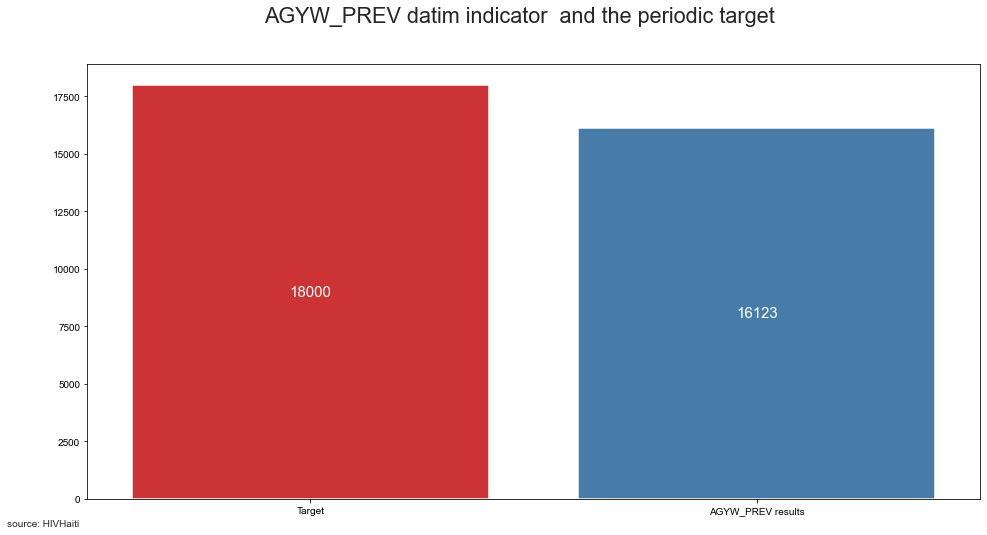

In [17]:
plt.subplots(figsize=(16,8))
sns.set_theme(style="white", context="talk")
sns.set_style("darkgrid")
sns.set_palette("Set1")
splot = sns.barplot(x="state",y="data",data=data_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW_PREV datim indicator  and the periodic target")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white",fontsize=15)
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("agyw_prev_evolution",dpi=1000)

In [18]:
datim.total_datimI
datim.total_datimII
datim.total_datimIII

7151

1801

7171

In [19]:
from plotnine import *

In [20]:
stack_data = pd.DataFrame( 
                  {     
                        "supp":["target","indicateur","indicateur","indicateur"],
                        "label": ["target","composante I","composante II","composante III"],
                        "data": [target,datim.total_datimI,
                                datim.total_datimII,
                                datim.total_datimIII]
                  })

stack_data


,supp,label,data
0,target,target,18000
1,indicateur,composante I,7151
2,indicateur,composante II,1801
3,indicateur,composante III,7171


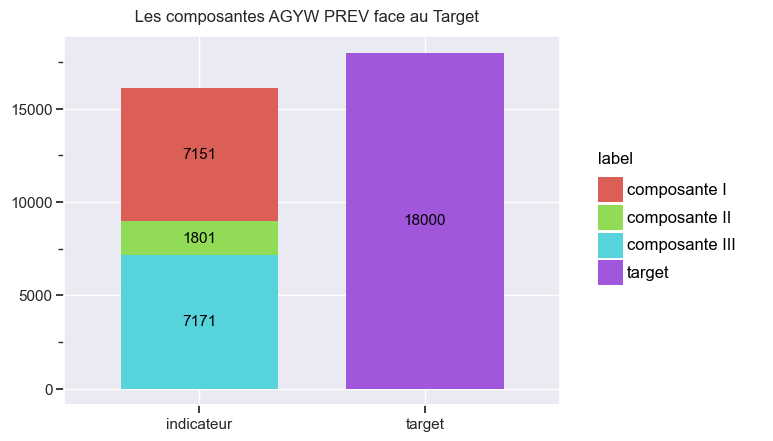

<ggplot: (159922209886)>

C:\Users\Wedner Adrien\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Wedner Adrien\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: composante_agywprev.png


In [21]:
p = (ggplot(stack_data,aes(x="supp",y="data",fill="label",width=0.7)) 
 + geom_bar(position=position_stack(vjust=0.5),stat="identity")
 + geom_text(aes(label="data"),position=position_stack(vjust=0.5))
 + ggtitle(" Les composantes AGYW PREV face au Target")
 + xlab("")
 +ylab("")
 +labs(caption =  "HIVHaiti")
 + theme_seaborn()
)
p
ggsave(plot=p,filename="composante_agywprev.png",dpi=1000)

## Les NO secondary

In [22]:
df= datim.data_dreams_valid

In [23]:
df.primary_only.unique()

array(['invalid', 'full_primary_only'], dtype=object)

In [24]:
df_prim_only = df[df.primary_only == "full_primary_only"]
df_part_primary = df[df.partial_primary_services == "primary_part_services"]
df_part_primary_no_secondary = df_part_primary[(df_part_primary.hts == "errata") & (df_part_primary.condoms == "errata") & (df_part_primary.post_care_treatment == "no") & (df_part_primary.socio_eco_app == "no")]

In [25]:
print("cohort")
total_cohort = df.code.count()
total_cohort

print("indicateur")
datim.total_datim_general

print("service primaire seulement")
total_prim_only = df_prim_only.code.count()
total_prim_only

print("Part services primaires")
total_part_primary = df_part_primary.code.count()
total_part_primary

print("Part service primaires no service secondaires")
total_part_primary_no_secondary = df_part_primary_no_secondary.code.count()
total_part_primary_no_secondary

cohort


18957

indicateur


16123

service primaire seulement


7151

Part services primaires


7171

Part service primaires no service secondaires


6233

In [26]:
data_for_MoreAGYWInfo = pd.DataFrame({
    "state":["valid cohort", "Target", "AGYW_PREV","Full primary only","Partial Primary","Partial primary no secondary"],
    "data":[total_cohort,18000,datim.total_datim_general,total_prim_only,total_part_primary,total_part_primary_no_secondary]
    
})

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'Visualization of the AGYW with no secondary services')

Text(0.0, 9478.5, '18957')

Text(1.0, 9000.0, '18000')

Text(2.0, 8061.5, '16123')

Text(3.0, 3575.5, '7151')

Text(4.0, 3585.5, '7171')

Text(5.0, 3116.5, '6233')

Text(-80, -20, 'source: HIVHaiti')

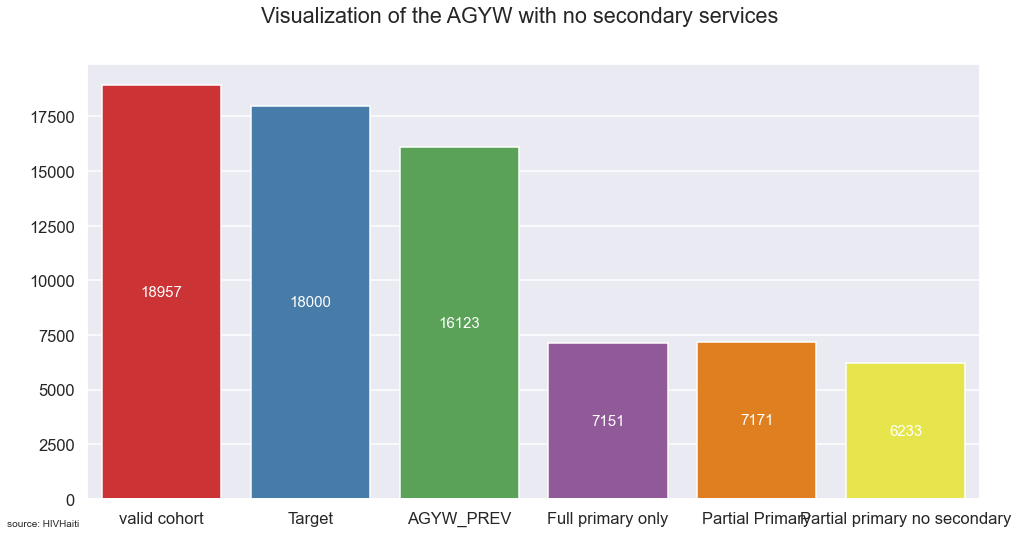

In [27]:
plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="state",y="data",data=data_for_MoreAGYWInfo)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("Visualization of the AGYW with no secondary services")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white",fontsize=15)
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("agyw_prev_with_no_secondary",dpi=1000)

In [28]:
df_part_primary_no_secondary.to_excel("part_primary_no_secondary.xlsx",index=False,na_rep="NULL")
df_prim_only.to_excel("primary_only.xlsx",index=False,na_rep="NULL")